#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css, code_toggle, printmd

In [3]:
css()

### Start med å importere modulene

In [4]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\graph_networkx_louvain.py`

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\nbtext.py`

# Aggregerte data, trendlinjer og ordmodeller fra ngram




### Her er trendlinjer for



In [10]:
nb.unigram('og')

,0
1950,3069549
1951,2487804
1952,2458150
1953,2438749
1954,2387490
1955,2279684
1956,2246508
1957,2516556
1958,2812289
1959,2849132


Gi navn til tabellen

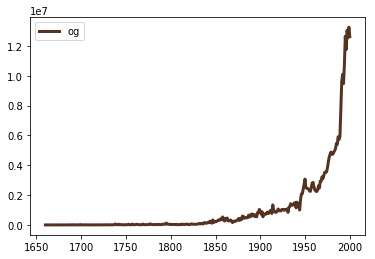

In [9]:
nb.frame(
    nb.unigram('og', (1660, 2000)), 
    'og'
).plot(lw = 3, color = '#553322')

In [21]:
likestilling = nb.unigram('likestilling', period=(1920, 2010))
likestilling2 = nb.unigram('likestilling', period=(1920, 2010), topic = 'kvinner')
likestilling3 = nb.unigram('likestilling', period=(1920, 2010), topic = 'arbeid')


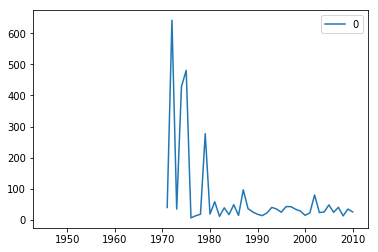

In [23]:
(likestilling/likestilling3).plot()

In [ ]:
(abort/og).plot()


In [ ]:
likestilling = unigram('likestilling')

In [ ]:
likestilling.plot()

In [ ]:
(likestilling/og).plot()

In [ ]:
pnkt = unigram('.')

In [ ]:
(unigram('han')/unigram(
'hun')).plot()

In [ ]:
han = unigram('han', period=(1980, 2020))
hun = unigram('hun',  period=(1980, 2020))

In [ ]:
han.plot()

In [ ]:
hun.plot()

In [ ]:
(han/og).plot()

In [ ]:
(han/hun).plot()

In [ ]:
han

In [ ]:
hen = nb.nb_ngram('han', smooth = 1, years = (1950, 2020), mode='abs' )

In [ ]:
hen

### Ordmodeller

Enkeltord - kapitaliseringssensitiv

In [ ]:
G = nb.make_graph('is', cutoff = 10)

In [ ]:
gnl.show_graph(G, spread = 1.9)

In [ ]:
gnl.show_communities(G)

## Kollokasjoner

Definer et korpus - hent data fra dewey for eksempel

In [ ]:
korpus = nb.get_urn({'emne':'vinter', 'limit':100, 'year':1990, 'next':30})

In [ ]:
coll = nb.urn_coll('snø', urns= korpus, before=4, after=4)

In [ ]:
coll.sort_values(by=0, ascending=False).head(20)

Sammenling korpuset med en referanse, her tar vi hele bokhylla

In [ ]:
totalen = nb.frame(nb.totals(5000))
totalen.head()



## Ordskyer

In [ ]:
diff = (coll**1.01/totalen).sort_values(by=0, ascending = False)

In [ ]:
nb.cloud(diff[:100])

# Dokument-term-matriser

### Analyse - viktigste ord

Bygg et korpus

In [ ]:
URNer = nb.get_urn({'ddk':"641%", 'year':1960, 'next':60})

In [ ]:
# hent term-matrisen med kommandoen nb.get_corpus_text( ... liste av urner ...)
dtm = nb.get_corpus_text([x[0] for x in URNer])

In [ ]:
nb.heatmap(dtm.sort_values(by = dtm.columns[1], ascending = False)[:50])

## Bruk Corpus-klassen

### Eksempel 1

Bygg korpus med kommandoen `nb.Corpus(... metadata ...)`.

In [ ]:
korpus = nb.Corpus(ddk='641%', period = (1990, 2010))

Det lages implisitt et referansekorpus fra samme periode som det sammenlignes med

In [ ]:
korpus.difference(doc_exp = 1.1, freq_exp = 1.1)

Lag en ordsky:

In [ ]:
nb.cloud(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus1 = nb.Corpus(ddk='700%', period = (1990, 2010))

In [ ]:
korpus1.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus1.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

### Eksempel 2

In [ ]:
korpus2 = nb.Corpus(ddk='230%', period = (1990, 2010))

In [ ]:
korpus2.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus2.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus3 = nb.Corpus(ddk='004%', period = (1990, 2010))

In [ ]:
nb.cloud(korpus3.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])